In [1]:
!pip install -q sentence-transformers numpy pandas

In [2]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harshiniryali","key":"575d0bfc943cb6254aff097326508a96"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tunguz/big-five-personality-test --force
!unzip -oq big-five-personality-test.zip -d bigfive


Dataset URL: https://www.kaggle.com/datasets/tunguz/big-five-personality-test
License(s): other
 85% 135M/159M [00:00<00:00, 1.41GB/s]
100% 159M/159M [00:00<00:00, 1.07GB/s]


In [6]:
!find bigfive -name "*.csv"

bigfive/IPIP-FFM-data-8Nov2018/data-final.csv


In [7]:
DATA_PATH= "bigfive/IPIP-FFM-data-8Nov2018/data-final.csv"

In [93]:
df= pd.read_csv(DATA_PATH, sep='\t')
print("Full Dataset Shape:", df.shape)

# Select ONLY the 50 Big Five questionnaire columns (remove _E columns)
trait_columns = [
    col for col in df.columns
    if col.startswith(('EXT', 'EST', 'AGR', 'CSN', 'OPN'))
    and not col.endswith('_E')
]

# Create filtered dataframe
df_traits = df[trait_columns]

print("Filtered Trait Dataset Shape:", df_traits.shape)

# Show first 5 rows (display all 50 columns clearly)
pd.set_option('display.max_columns', None)
df_traits.head()

Full Dataset Shape: (1015341, 110)
Filtered Trait Dataset Shape: (1015341, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [9]:
QUESTIONNAIRE = {
    "EXT": {
        "EXT1": "I am the life of the party.",
        "EXT2": "I feel comfortable around people.",
        "EXT3": "I start conversations.",
        "EXT4": "I talk to a lot of different people at parties.",
        "EXT5": "I don't mind being the center of attention.",
        "EXT6": "I make friends easily.",
        "EXT7": "I am skilled in handling social situations.",
        "EXT8": "I am outgoing and sociable.",
        "EXT9": "I enjoy social gatherings.",
        "EXT10": "I feel energized when interacting with others."
    },

    "EST": {
        "EST1": "I get stressed out easily.",
        "EST2": "I worry about things.",
        "EST3": "I feel anxious often.",
        "EST4": "I get upset easily.",
        "EST5": "I change my mood a lot.",
        "EST6": "I have frequent mood swings.",
        "EST7": "I get irritated easily.",
        "EST8": "I feel emotionally unstable.",
        "EST9": "I feel nervous in difficult situations.",
        "EST10": "I feel overwhelmed by stress."
    },

    "AGR": {
        "AGR1": "I am interested in people.",
        "AGR2": "I sympathize with others’ feelings.",
        "AGR3": "I have a soft heart.",
        "AGR4": "I take time out for others.",
        "AGR5": "I feel others' emotions.",
        "AGR6": "I make people feel at ease.",
        "AGR7": "I care about others.",
        "AGR8": "I am helpful and unselfish.",
        "AGR9": "I trust others easily.",
        "AGR10": "I am considerate."
    },

    "CSN": {
        "CSN1": "I am always prepared.",
        "CSN2": "I pay attention to details.",
        "CSN3": "I get chores done right away.",
        "CSN4": "I follow a schedule.",
        "CSN5": "I am exacting in my work.",
        "CSN6": "I complete tasks efficiently.",
        "CSN7": "I plan ahead.",
        "CSN8": "I am disciplined.",
        "CSN9": "I meet deadlines.",
        "CSN10": "I am reliable."
    },

    "OPN": {
        "OPN1": "I have a rich vocabulary.",
        "OPN2": "I have a vivid imagination.",
        "OPN3": "I have excellent ideas.",
        "OPN4": "I am quick to understand things.",
        "OPN5": "I enjoy abstract ideas.",
        "OPN6": "I enjoy artistic experiences.",
        "OPN7": "I value creativity.",
        "OPN8": "I like to explore new concepts.",
        "OPN9": "I enjoy philosophical discussions.",
        "OPN10": "I am curious about many things."
    }
}

In [75]:
user_answers = {}

print("Answer each question using numbers:")
print("1 = Strongly Disagree | 2 = Disagree | 3 = Neutral | 4 = Agree | 5 = Strongly Agree\n")

for trait, questions in QUESTIONNAIRE.items():
    print(f"\n======== {trait} TRAIT ========")
    for idx, (qid, question) in enumerate(questions.items(), 1):
        while True:
            try:
                ans = int(input(f"Q{idx}. {question}\nYour response (1-5): "))
                if 1 <= ans <= 5:
                    user_answers[qid] = ans
                    break
                else:
                    print("❌ Invalid input! Please enter a number between 1 and 5.")
            except ValueError:
                print("❌ Invalid input! Please enter a valid integer.")


Answer each question using numbers:
1 = Strongly Disagree | 2 = Disagree | 3 = Neutral | 4 = Agree | 5 = Strongly Agree


======== EXT TRAIT ========
Q1. I am the life of the party.
Your response (1-5): 2
Q2. I feel comfortable around people.
Your response (1-5): 3
Q3. I start conversations.
Your response (1-5): 3
Q4. I talk to a lot of different people at parties.
Your response (1-5): 2
Q5. I don't mind being the center of attention.
Your response (1-5): 2
Q6. I make friends easily.
Your response (1-5): 4
Q7. I am skilled in handling social situations.
Your response (1-5): 4
Q8. I am outgoing and sociable.
Your response (1-5): 3
Q9. I enjoy social gatherings.
Your response (1-5): 4
Q10. I feel energized when interacting with others.
Your response (1-5): 4

======== EST TRAIT ========
Q1. I get stressed out easily.
Your response (1-5): 5
Q2. I worry about things.
Your response (1-5): 2
Q3. I feel anxious often.
Your response (1-5): 3
Q4. I get upset easily.
Your response (1-5): 1
Q5. I

In [76]:
# ================= TRAIT SCORING MODULE =================

user_trait_scores = {}

for trait, questions in QUESTIONNAIRE.items():
    values = [user_answers[q] for q in questions]
    mean_score = np.mean(values)

    # Normalize score to 0–1 range
    normalized = round((mean_score - 1) / 4, 3)

    # Reverse scoring for EST
    if trait == "EST":
        normalized = round(1 - normalized, 3)

    user_trait_scores[trait] = float(normalized)



In [77]:
def dominance_ranking(trait_scores):
    return sorted(trait_scores.items(), key=lambda x: x[1], reverse=True)

def stability_index(scores):
    return round(1 - np.var(list(scores.values())), 3)

def psychological_risk(scores):
    lows = sum(v < 0.35 for v in scores.values())
    if lows >= 3: return "High Psychological Risk"
    if lows == 2: return "Moderate Psychological Risk"
    return "Low Psychological Risk"

def recommendations(scores):
    top = dominance_ranking(scores)[0][0]
    return {
        "EXT": "Leadership and networking roles",
        "EST": "Stress management and emotional balance",
        "AGR": "People-oriented environments",
        "CSN": "Structured and goal-driven roles",
        "OPN": "Creative and research roles"
    }[top]

def careers(scores):
    top = dominance_ranking(scores)[0][0]
    return {
        "EXT": ["Marketing", "Sales"],
        "EST": ["Healthcare", "Counseling"],
        "AGR": ["HR", "Teaching"],
        "CSN": ["Engineering", "Accounting"],
        "OPN": ["Design", "Research"]
    }[top]


In [78]:
def build_user_text(user_answers):
    text = ""
    for question, answer in user_answers.items():
        text += question + " Response: " + str(answer) + ". "
    return text


In [79]:
# ================= SBERT SEMANTIC EMBEDDING MODULE =================

from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# Load SBERT model
sbert = SentenceTransformer("paraphrase-MiniLM-L3-v2")

# Build user textual profile
user_text = build_user_text(user_answers)

# Generate embedding
user_embedding = sbert.encode([user_text])

# Normalize embedding (important for cosine similarity stability)
user_embedding = normalize(user_embedding)

print("SBERT embedding generated successfully.")
print("Embedding shape:", user_embedding.shape)


Loading weights:   0%|          | 0/55 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/paraphrase-MiniLM-L3-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


SBERT embedding generated successfully.
Embedding shape: (1, 384)


In [80]:
# ================= SBERT TRAIT PROTOTYPE ANALYSIS =================

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

# Define semantic descriptions for each trait
trait_descriptions = {
    "EXT": "Outgoing, energetic, talkative, socially confident and enthusiastic person.",
    "EST": "Emotionally stable, calm, resilient under stress and balanced personality.",
    "AGR": "Kind, cooperative, empathetic, compassionate and helpful individual.",
    "CSN": "Organized, disciplined, responsible, goal-oriented and detail-focused person.",
    "OPN": "Creative, imaginative, curious, innovative and open-minded thinker."
}

# Encode trait prototypes
trait_embeddings = sbert.encode(list(trait_descriptions.values()))
trait_embeddings = normalize(trait_embeddings)

# Ensure user embedding is normalized
user_embedding = normalize(user_embedding)

# Compute cosine similarity (raw range: -1 to 1)
raw_similarity = cosine_similarity(user_embedding, trait_embeddings)[0]

# Convert from [-1, 1] → [0, 1] to avoid negative values
normalized_similarity = (raw_similarity + 1) / 2

# Store results in dictionary
semantic_scores = {
    trait: round(float(score), 4)
    for trait, score in zip(trait_descriptions.keys(), normalized_similarity)
}

print("\nSemantic Similarity Scores (SBERT-Based):")
for trait, score in semantic_scores.items():
    print(f"{trait}: {score}")




Semantic Similarity Scores (SBERT-Based):
EXT: 0.5531
EST: 0.5412
AGR: 0.5015
CSN: 0.4647
OPN: 0.4556


In [81]:
def trait_dominance(scores):
  return sorted(scores.items(), key=lambda x:x[1], reverse=True)

In [82]:
def stability_index(scores):
    values = list(scores.values())
    variance = np.var(values)
    mean_strength = np.mean(values)
    stability = (1 - variance) * mean_strength
    return round(float(stability), 3)


In [83]:
def psychological_risk(scores):
    risk_score = 0

    if scores["EST"] < 0.35:
        risk_score += 2  # Emotional instability is critical

    if scores["CSN"] < 0.30:
        risk_score += 1

    if scores["AGR"] < 0.30:
        risk_score += 1

    if risk_score >= 3:
        return "High Psychological Risk"
    elif risk_score == 2:
        return "Moderate Psychological Risk"
    else:
        return "Low Psychological Risk"


In [84]:
def confidence_weight(scores):
  output = {}
  for trait, val in scores.items():
    if val >= 0.7:
      output[trait] = "High"
    elif val >= 0.4:
      output[trait] = "Moderate"
    else:
      output[trait] = "Low"
  return output

In [85]:
def personality_risk_heat(scores):
    heat = {}

    for trait, val in scores.items():

        if trait == "EST":
            heat[trait] = "High" if val < 0.5 else "Low"
        else:
            heat[trait] = "High" if val < 0.35 else "Low"

    return heat


In [86]:
def trait_conflict(scores):
    conflicts = []

    if scores["EXT"] > 0.7 and scores["EST"] < 0.35:
        conflicts.append("High Extraversion with Emotional Instability")

    if scores["CSN"] > 0.7 and scores["OPN"] < 0.35:
        conflicts.append("High Conscientiousness with Low Openness (Rigid Structure)")

    if scores["AGR"] > 0.7 and scores["CSN"] < 0.35:
        conflicts.append("High Agreeableness with Low Discipline")

    return conflicts if conflicts else ["No major conflicts detected"]


In [87]:
def personalized_recommendation(scores):
    max_trait = max(scores, key=scores.get)
    max_score = scores[max_trait]

    if max_score < 0.30:
        return (
            "Focus on emotional support, self-awareness, "
            "confidence building, and gradual personal development."
        )

    elif 0.30 <= max_score <0.60:
        return (
            "Engage in structured skill development, guided learning, "
            "and gradual responsibility-building activities."
        )

    else:
        trait_based_recommendations = {
            "EXT": "Engage in leadership, networking, and public-facing roles",
            "EST": "Practice stress-management and emotional regulation techniques",
            "AGR": "Collaborative and people-oriented environments suit you",
            "CSN": "Structured, detail-oriented, and goal-driven roles are ideal",
            "OPN": "Creative, research, and innovation-focused roles fit you well"
        }

    return trait_based_recommendations.get(
        max_trait,
        "Pursue balanced personal and professional development paths."
    )

In [88]:
def career_paths(scores):
    max_score = max(scores.values())

    if max_score < 0.30:
        return [
            "Personal development programs",
            "Counseling and mentoring",
            "Skill-building workshops"
        ]

    if 0.30 <= max_score < 0.60:
        return [
            "Structured training programs",
            "Apprenticeship roles",
            "Supervised entry-level positions"
        ]

    dominant = trait_dominance(scores)[0][0]
    trait_to_career = {
        "EXT": ["Marketing", "Sales", "Public Relations", "Management"],
        "EST": ["Healthcare", "Psychology"],
        "AGR": ["HR", "Teaching"],
        "CSN": ["Software Engineering", "Accounting"],
        "OPN": ["Research", "Design"]
    }

    return trait_to_career.get(
        dominant,
         ["General professional development"]
    )

In [89]:
# ================= SBERT EXPLAINABILITY MODULE =================

def sbert_explainability(semantic_scores):
    ranked = sorted(semantic_scores.items(), key=lambda x: x[1], reverse=True)

    print("\nSBERT-Based Semantic Dominance Ranking:")
    for trait, score in ranked:
        print(f"{trait}: {score}")

    top_trait = ranked[0][0]

    return f"Semantically, the personality aligns most strongly with {top_trait} based on contextual similarity."


In [90]:
print("\nOVERALL PERSONALITY SUMMARY")
print("-" * 40)

# -------- Dominant Traits (Questionnaire-Based) --------
print("\nDominant Traits (Questionnaire-Based):\n")
for t, v in trait_dominance(user_trait_scores):
    print(f"{t}: {v*100:.2f}%")

# -------- Stability & Risk Analysis --------
print("\nStability Index:", stability_index(user_trait_scores))
print("\nPsychological Risk:", psychological_risk(user_trait_scores))
print("\nConfidence Weighted Interpretation:", confidence_weight(user_trait_scores))
print("\nRisk Heat Levels:", personality_risk_heat(user_trait_scores))
print("\nTrait Conflicts:", trait_conflict(user_trait_scores))

# -------- Recommendations --------
print("\nPersonalized Recommendation:", personalized_recommendation(user_trait_scores))
print("\nCareer Paths:", career_paths(user_trait_scores))

# -------- SBERT Semantic Analysis --------
print("\nSBERT Semantic Similarity Scores:")
for trait, score in semantic_scores.items():
    print(f"{trait}: {score}")

print("\nSBERT Semantic Interpretation:")
print(sbert_explainability(semantic_scores))




OVERALL PERSONALITY SUMMARY
----------------------------------------

Dominant Traits (Questionnaire-Based):

CSN: 85.00%
AGR: 82.50%
EXT: 52.50%
EST: 50.00%
OPN: 50.00%

Stability Index: 0.623

Psychological Risk: Low Psychological Risk

Confidence Weighted Interpretation: {'EXT': 'Moderate', 'EST': 'Moderate', 'AGR': 'High', 'CSN': 'High', 'OPN': 'Moderate'}

Risk Heat Levels: {'EXT': 'Low', 'EST': 'Low', 'AGR': 'Low', 'CSN': 'Low', 'OPN': 'Low'}

Trait Conflicts: ['No major conflicts detected']

Personalized Recommendation: Structured, detail-oriented, and goal-driven roles are ideal

Career Paths: ['Software Engineering', 'Accounting']

SBERT Semantic Similarity Scores:
EXT: 0.5531
EST: 0.5412
AGR: 0.5015
CSN: 0.4647
OPN: 0.4556

SBERT Semantic Interpretation:

SBERT-Based Semantic Dominance Ranking:
EXT: 0.5531
EST: 0.5412
AGR: 0.5015
CSN: 0.4647
OPN: 0.4556
Semantically, the personality aligns most strongly with EXT based on contextual similarity.


In [65]:
trait_items = {
    'EXT': [f'EXT{i}' for i in range(1, 11)],
    'EST': [f'EST{i}' for i in range(1, 11)],
    'AGR': [f'AGR{i}' for i in range(1, 11)],
    'CSN': [f'CSN{i}' for i in range(1, 11)],
    'OPN': [f'OPN{i}' for i in range(1, 11)],
}

In [66]:
dataset_trait_scores = {}

for trait, items in trait_items.items():
    dataset_trait_scores[trait] = df[items].mean(axis=1)


In [67]:
true_labels = {}
predicted_labels = {}

for trait in dataset_trait_scores:
    median = dataset_trait_scores[trait].median()
    true_labels[trait] = (dataset_trait_scores[trait] >= median).astype(int)
    predicted_labels[trait] = (dataset_trait_scores[trait] >= 3).astype(int)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# traits = ["EXT", "EST", "AGR", "CSN", "OPN"]

accuracy_results = {}
precision_results = {}
recall_results = {}
f1_results = {}

for trait in dataset_trait_scores:
    y_true = true_labels[trait]
    y_pred = predicted_labels[trait]

    accuracy_results[trait] = accuracy_score(y_true, y_pred)
    precision_results[trait] = precision_score(y_true, y_pred, average='weighted')
    recall_results[trait] = recall_score(y_true, y_pred, average='weighted')
    f1_results[trait] = f1_score(y_true, y_pred, average='weighted')



In [91]:
import pandas as pd

results_df = pd.DataFrame({
    "Accuracy": accuracy_results,
    "Precision": precision_results,
    "Recall": recall_results,
    "F1-Score": f1_results
})

results_df


,Accuracy,Precision,Recall,F1-Score
EXT,1.000000,1.000000,1.000000,1.000000
EST,1.000000,1.000000,1.000000,1.000000
AGR,0.783513,0.846545,0.783513,0.769829
CSN,0.896551,0.912013,0.896551,0.893289
OPN,0.734558,0.821643,0.734558,0.706173


In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


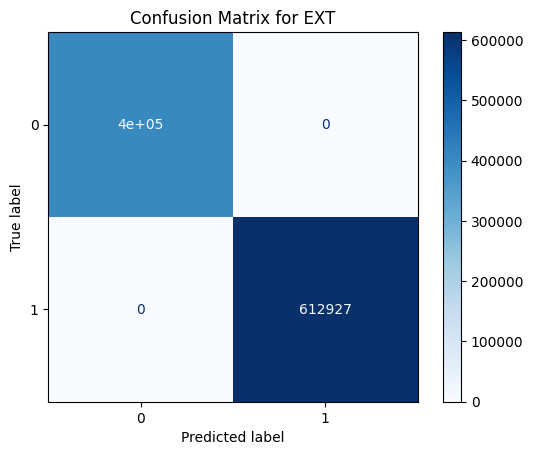

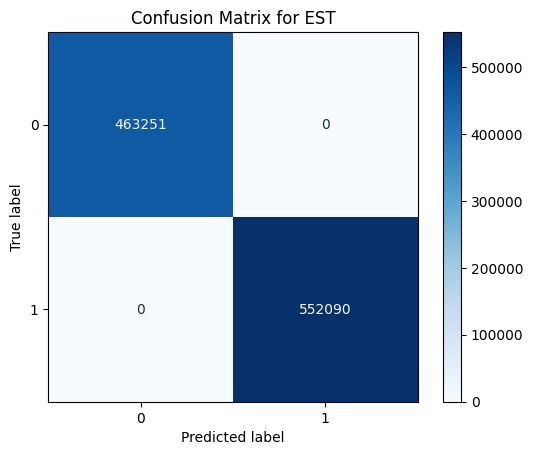

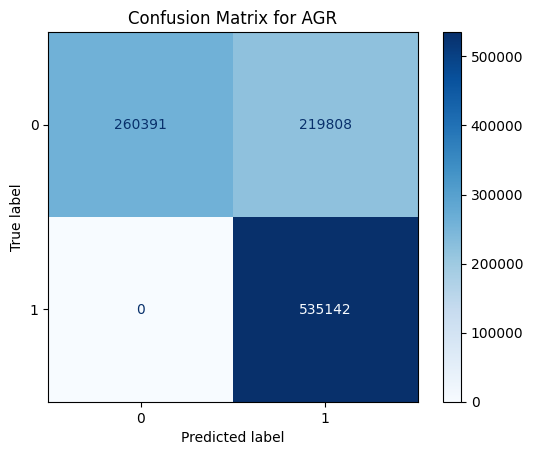

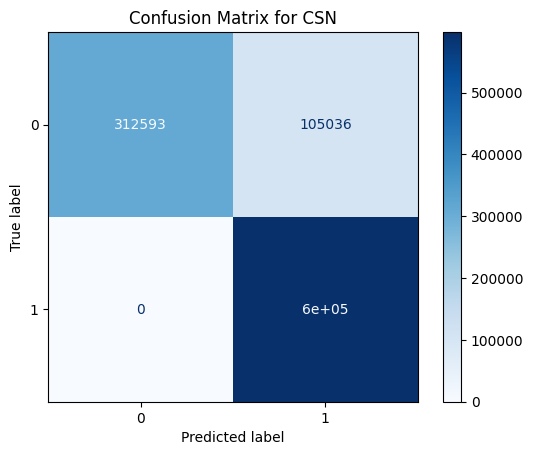

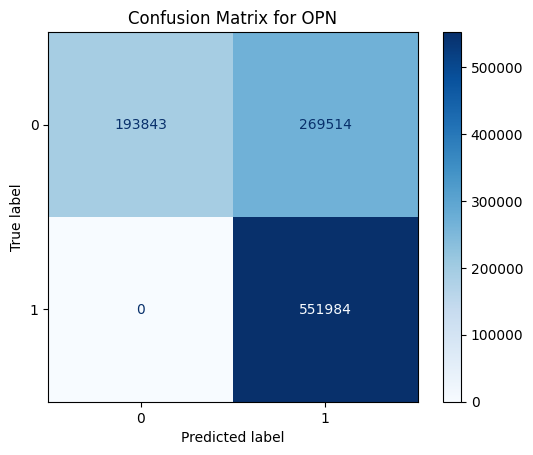

In [71]:
for trait in dataset_trait_scores:
    cm = confusion_matrix(true_labels[trait], predicted_labels[trait])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")

    plt.title(f"Confusion Matrix for {trait}")
    plt.show()


In [72]:
import numpy as np

avg_accuracy = np.mean(list(accuracy_results.values()))
avg_precision = np.mean(list(precision_results.values()))
avg_recall = np.mean(list(recall_results.values()))
avg_f1 = np.mean(list(f1_results.values()))

print("Overall Performance (Macro Average):")
print(f"Average Accuracy : {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall   : {avg_recall:.4f}")
print(f"Average F1-Score : {avg_f1:.4f}")


Overall Performance (Macro Average):
Average Accuracy : 0.8829
Average Precision: 0.9160
Average Recall   : 0.8829
Average F1-Score : 0.8739


In [73]:
print("Trait-wise Acccuracy:\n")
for trait, acc in accuracy_results.items():
    print(f"{trait}: {acc * 100:.2f}%")

overall_accuracy = sum(accuracy_results.values()) / len(accuracy_results)

print(f"\nOverall System Accuracy: {overall_accuracy * 100:.2f}%")

Trait-wise Acccuracy:

EXT: 100.00%
EST: 100.00%
AGR: 78.35%
CSN: 89.66%
OPN: 73.46%

Overall System Accuracy: 88.29%


In [74]:
print("User scores:", user_trait_scores)
print("Dataset keys:", list(dataset_trait_scores.keys()))


User scores: {'EXT': 1.0, 'EST': 1.0, 'AGR': 1.0, 'CSN': 1.0, 'OPN': 1.0}
Dataset keys: ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
